In [2]:
import pandas as pd 
#load the data file "online_classroom_data"
online = pd.read_csv("online_classroom_data.csv",sep = ',') 
# Preview the first 5 lines of the loaded data 
online.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


In [3]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          71 non-null     int64  
 1   total_posts         71 non-null     float64
 2   helpful_post        71 non-null     float64
 3   nice_code_post      71 non-null     float64
 4   collaborative_post  71 non-null     float64
 5   confused_post       71 non-null     float64
 6   creative_post       71 non-null     float64
 7   bad_post            71 non-null     float64
 8   amazing_post        71 non-null     float64
 9   timeonline          71 non-null     float64
 10  sk1_classroom       71 non-null     object 
 11  sk2_classroom       71 non-null     object 
 12  sk5_classroom       71 non-null     object 
 13  sk3_classroom       71 non-null     object 
 14  sk4_classroom       71 non-null     object 
 15  Approved            71 non-null     int64  
dtypes: float64

In [5]:
online["sk1_classroom"] = online["sk1_classroom"].str.replace(",",".").astype(float)
online["sk2_classroom"] = online["sk2_classroom"].str.replace(",",".").astype(float)
online["sk3_classroom"] = online["sk3_classroom"].str.replace(",",".").astype(float)
online["sk4_classroom"] = online["sk4_classroom"].str.replace(",",".").astype(float)
online["sk5_classroom"] = online["sk5_classroom"].str.replace(",",".").astype(float)

In [6]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          71 non-null     int64  
 1   total_posts         71 non-null     float64
 2   helpful_post        71 non-null     float64
 3   nice_code_post      71 non-null     float64
 4   collaborative_post  71 non-null     float64
 5   confused_post       71 non-null     float64
 6   creative_post       71 non-null     float64
 7   bad_post            71 non-null     float64
 8   amazing_post        71 non-null     float64
 9   timeonline          71 non-null     float64
 10  sk1_classroom       71 non-null     float64
 11  sk2_classroom       71 non-null     float64
 12  sk5_classroom       71 non-null     float64
 13  sk3_classroom       71 non-null     float64
 14  sk4_classroom       71 non-null     float64
 15  Approved            71 non-null     int64  
dtypes: float64

In [7]:
online.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,2.1,2.4,3.5,3.6,1.7,0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,0.3,0.3,0.0,0.1,0.2,0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8.0,5.0,5.0,7.0,5.0,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6.0,5.0,4.0,6.0,4.0,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,8.7,9.0,6.5,10.0,8.8,1


In [8]:
X= online.drop(['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom','Approved','Unnamed: 0'],axis=1)
X=X.loc[X.timeonline != '0']
Y = online[['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom']]
Y=Y.sum(axis=1)
Y.head()

0    13.3
1     0.9
2    30.0
3    25.0
4    43.0
dtype: float64

In [9]:
online=online.loc[online.timeonline != '0']
online.describe()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.000000,5.507042,4.028169,7.478873,11.366197,0.549296,18.309859,0.056338,18.957746,10279.126761,5.246479,5.078873,4.788732,5.445070,6.878873,0.704225
std,20.639767,6.480461,6.843082,12.746831,13.970622,1.350013,21.930795,0.287219,22.086477,10176.243372,3.324190,3.273396,3.448252,3.564459,3.856198,0.459639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,2.000000,0.000000,0.000000,1.500000,0.000000,6.500000,0.000000,7.000000,1627.500000,2.150000,2.050000,0.500000,1.150000,4.500000,0.000000
50%,35.000000,4.000000,3.000000,2.000000,7.000000,0.000000,14.000000,0.000000,16.000000,7664.000000,6.000000,5.700000,5.000000,6.700000,8.700000,1.000000
75%,52.500000,7.500000,5.500000,12.500000,16.000000,0.000000,24.000000,0.000000,25.500000,16574.000000,8.000000,8.000000,8.000000,8.000000,9.600000,1.000000
max,70.000000,46.000000,53.000000,90.000000,89.000000,7.000000,150.000000,2.000000,155.000000,43612.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Here, we realize that the timeonline is zero for many students and they are not approved totally. So, we want to deal with the students who are participating the e-learning platform and we drop the rows which are for students with timeonline zero.

Saving figure attribute_histogram_plots_online


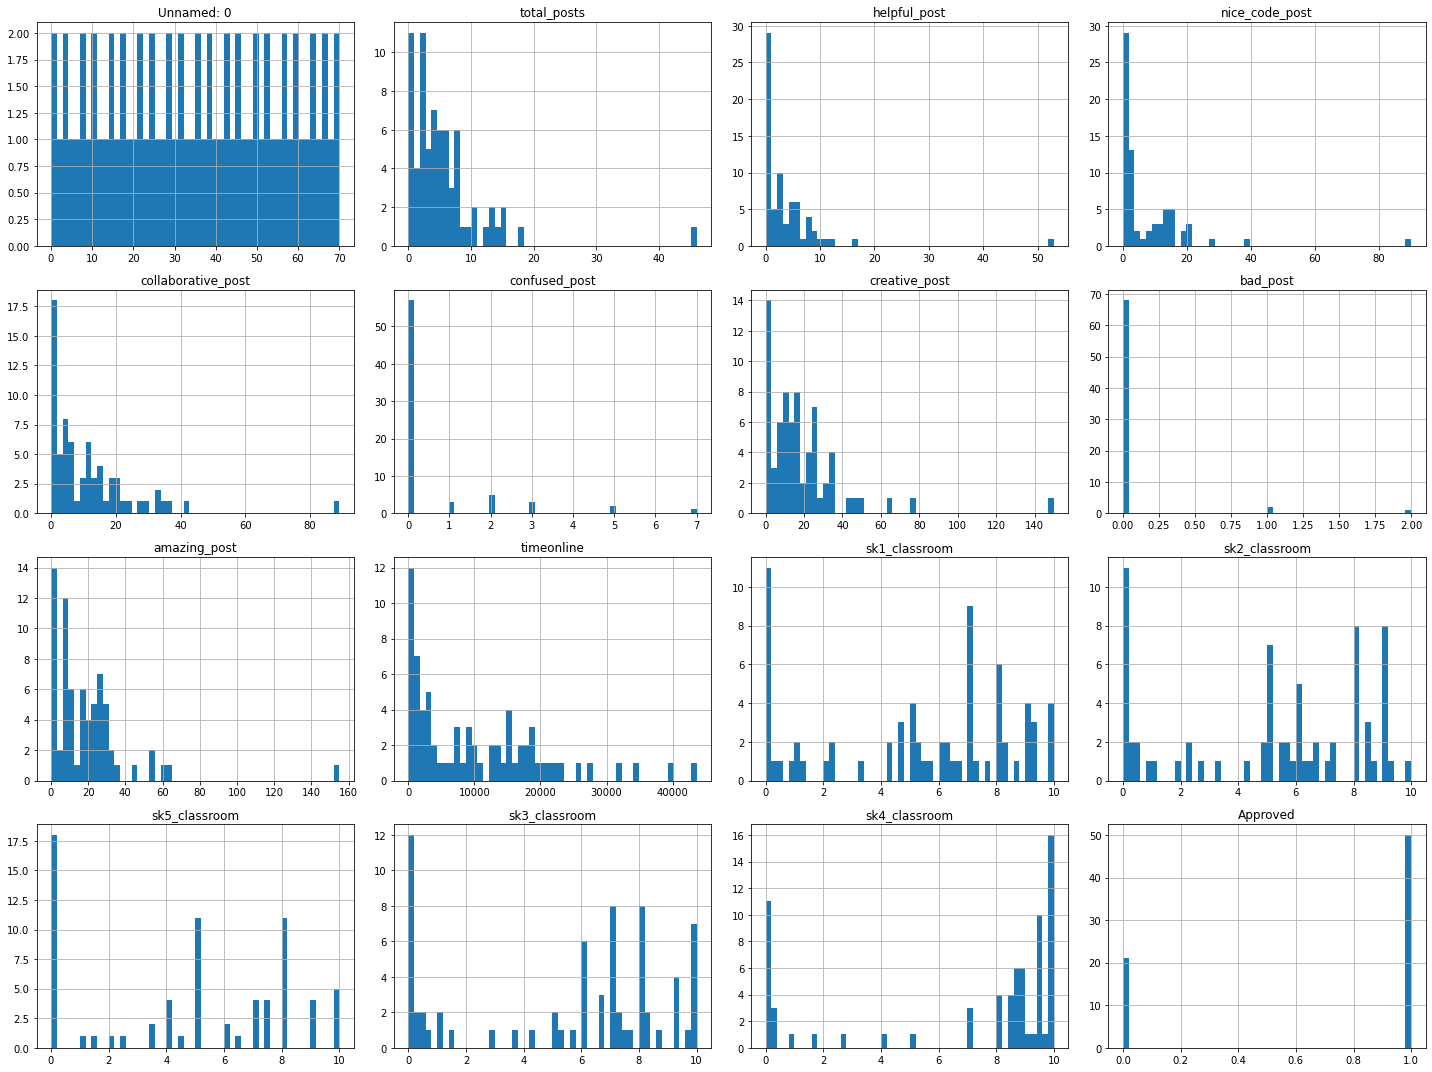

In [10]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
online.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_online")
plt.show()

# First Analysis #
At that point we have many choices to go on deeper. First way will be a regression tree to observe the most important features on the dataset. Let us start with plotting total skills point value for the whole paprticipants.

C:\Users\Mmn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


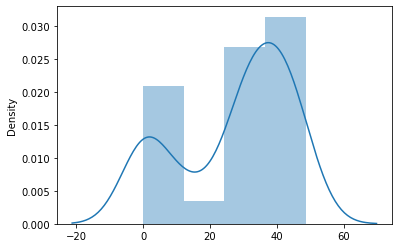

In [11]:
import seaborn as sns
sns.distplot(Y)
plt.show()

A random forest algorithm is shortly a collection of decision trees. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 8.60
Mean Squared Error (MSE): 136.71
Root Mean Squared Error (RMSE): 11.69


Mean Absolute Error (MAE): 9.37
Mean Squared Error (MSE): 154.63
Root Mean Squared Error (RMSE): 12.44


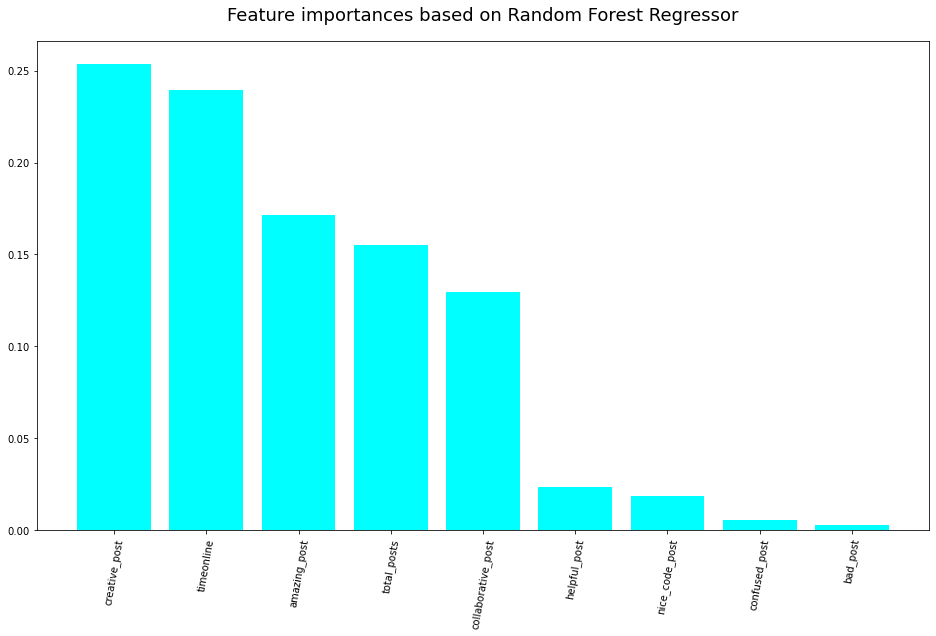

In [14]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train)

mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

The project shows us that the development of the student in an e-learning environment is strongly related with the social reactions given by other students. This can be a two sided effect. Addtonally, time passed in the online platform is another very important feature in development of the student with different skills throughout the lesson.

Another important conclusion is that the random forest regressor performs well on predicting the total skills point of the participants with respect to their different social posts and timeonline periods.

# Second Analysis #
In the second way we combine whole nice posts like "amazing post", "nice code" etc. We treat them like one variable. Then we deep dive to see the relations of sk_total which is combination of whole points from different skills and time online and nice posts variable.

In [15]:
online["sk_total"]=Y

In [16]:
online_dropped=online.drop(['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom'],axis=1)

In [17]:
Y1=online_dropped[['helpful_post','nice_code_post','collaborative_post','creative_post','amazing_post']]
Y1=Y1.sum(axis=1)
online_dropped["nice_posts"]=Y1
online_clean=online_dropped.drop(['helpful_post','nice_code_post','collaborative_post','creative_post','amazing_post','total_posts','confused_post','bad_post'],axis=1)

In [18]:
online_clean.head()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
0,0,1600.0,0,13.3,7.0
1,1,592.0,0,0.9,6.0
2,2,1110.0,1,30.0,40.0
3,3,8651.0,1,25.0,32.0
4,4,34172.0,1,43.0,144.0


Saving figure attribute_histogram_plots_online_basic


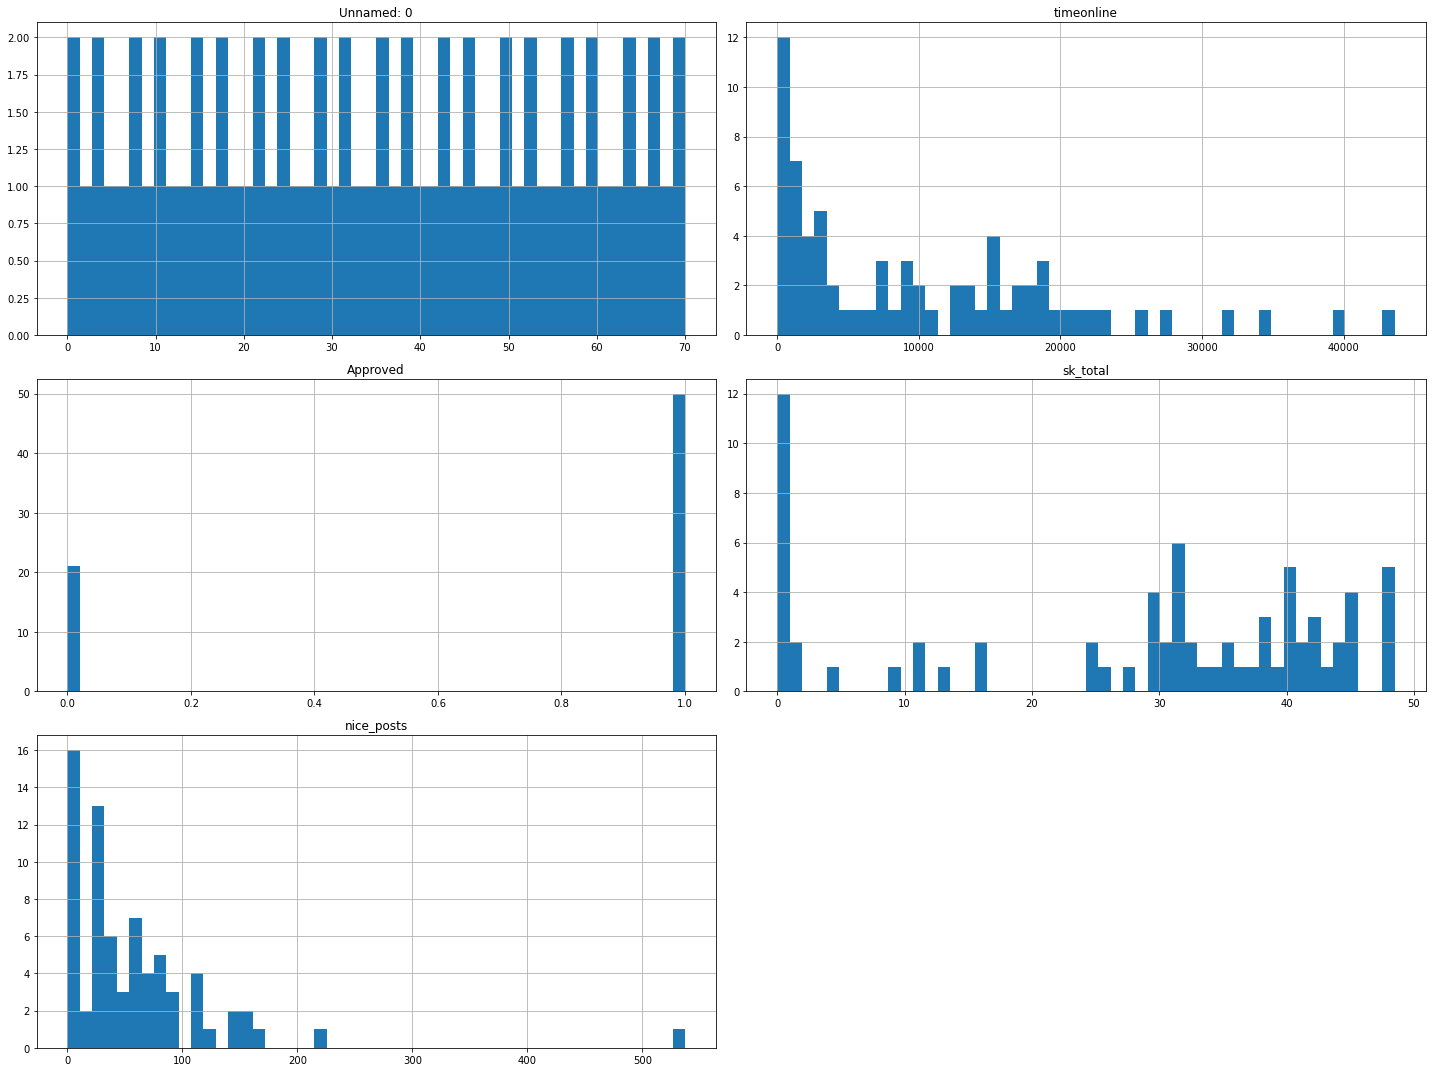

In [19]:
online_clean.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_online_basic")
plt.show()

Before going on with deleting the students with timeline zero, we want to go deeper in this problem.

In [20]:
online_nonattenders=online_clean[online_clean['timeonline']== 0]
online_nonattenders.describe()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
count,9.000000,9.0,9.0,9.0,9.0
mean,46.333333,0.0,0.0,0.0,0.0
std,10.874282,0.0,0.0,0.0,0.0
min,30.000000,0.0,0.0,0.0,0.0
25%,42.000000,0.0,0.0,0.0,0.0
50%,47.000000,0.0,0.0,0.0,0.0
75%,56.000000,0.0,0.0,0.0,0.0
max,60.000000,0.0,0.0,0.0,0.0


Yes, we can delete them :)

In [21]:
online_clc=online_clean[online_clean['timeonline']!= 0]
online_clc.describe()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,33.354839,11771.258065,0.806452,31.420968,68.870968
std,21.251883,10049.003505,0.398304,13.717730,76.350676
min,0.000000,368.000000,0.000000,0.100000,0.000000
25%,15.250000,3001.000000,1.000000,28.350000,25.500000
50%,32.000000,9538.500000,1.000000,33.800000,52.500000
75%,51.750000,17606.750000,1.000000,41.350000,84.250000
max,70.000000,43612.000000,1.000000,48.500000,537.000000


Let us see how these features effect a student to be approved.

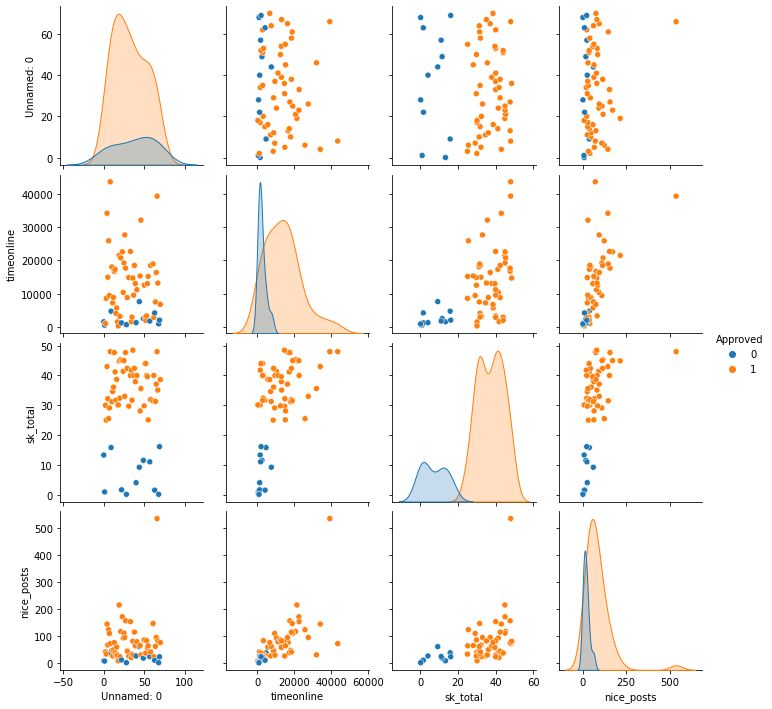

In [22]:
import seaborn as sns
sns.pairplot(online_clc, hue = 'Approved')

We clearly see that all these features are effecting to be approved. To see this another way is to get the correlation matrix.

In [23]:
online_clc.corr()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
Unnamed: 0,1.000000,-0.082482,-0.096334,-0.055730,0.109861
timeonline,-0.082482,1.000000,0.456528,0.523528,0.649841
Approved,-0.096334,0.456528,1.000000,0.875959,0.329074
sk_total,-0.055730,0.523528,0.875959,1.000000,0.454666
nice_posts,0.109861,0.649841,0.329074,0.454666,1.000000


The strongest relation is between sk_total, nice_posts and timeonline. The reason is that the approved variable is a classification type of variable.

Saving figure online_learning_visualization_plot


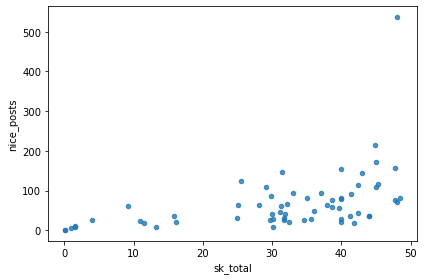

In [24]:
online_clc.plot(kind="scatter", x="sk_total", y="nice_posts",alpha=0.8)
save_fig("online_learning_visualization_plot")

Plotting the scattered plot for nice_post and sk_total shows their relation better. We try to get a univariate linear regression from these two variables.

In [25]:
import numpy as np
data_X=online_clc["sk_total"].copy()
data_labels=online_clc["nice_posts"].copy()
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
data_X_train=pd.DataFrame(data_X_train)
#data_X_train=data_X_train.reshape(-1, 1)
lin_reg.fit(data_X_train,data_labels_train)
data_pred_train=lin_reg.predict(data_X_train)

In [27]:
data_X_test=pd.DataFrame(data_X_test)
data_pred=lin_reg.predict(data_X_test)
print("Predictions:", lin_reg.predict(data_X_test))

Predictions: [ 65.55190848 105.13681501 -13.35400522  65.81580785  91.94184617
  68.98260038  84.28876424  52.62083901  95.63643744 112.26209819
 -11.24281021  -9.39551457  73.46888978]


In [28]:
from sklearn.metrics import mean_squared_error

data_pred = lin_reg.predict(data_X_test)
lin_mse = mean_squared_error(data_labels_test, data_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

31.000065569035893

In [29]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(data_labels_test, data_pred)
lin_mae

23.472578775448955

C:\Users\Mmn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

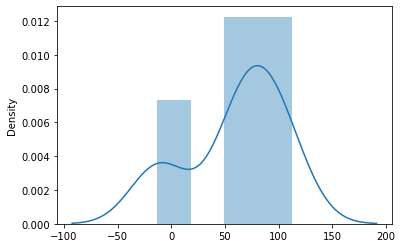

In [30]:
import seaborn as sns
sns.distplot((data_pred))

In [31]:
data_labels_pred=pd.DataFrame(data_pred)
data_labels_pred.head()

,0
0,65.551908
1,105.136815
2,-13.354005
3,65.815808
4,91.941846


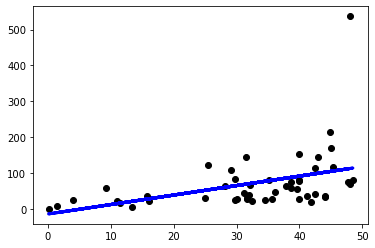

In [32]:
plt.scatter(data_X_train, data_labels_train,  color='black')
plt.plot(data_X_train, data_pred_train, color='blue', linewidth=3)

In [33]:
online_clc[online_clc['nice_posts']>=300]

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
66,66,39314.0,1,48.0,537.0


This is a very extraordinary student!

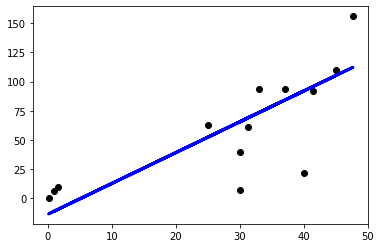

In [36]:
plt.scatter(data_X_test, data_labels_test,  color='black')
plt.plot(data_X_test, data_pred, color='blue', linewidth=3)